In [1]:
# Working with the data
import requests
import io
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from sklearn.preprocessing import LabelEncoder
from io import BytesIO
from zipfile import ZipFile
import os
import tempfile

# Visualisation
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import folium
from folium import plugins
import seaborn as sns
import branca.colormap as cm
from branca.colormap import StepColormap

%matplotlib inline

In [2]:
# Data manipulation and analysis libraries
import pandas as pd
import numpy as np
import requests
import io
from sklearn.preprocessing import LabelEncoder
from io import BytesIO
from zipfile import ZipFile
import tempfile
import os
import json

# Geo
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Visualization
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cm
from branca.colormap import StepColormap

%matplotlib inline


In [3]:
# Define a function to download and read a CSV file.
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/business-establishments-with-address-and-industry-classification/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/property-level-energy-consumption-modelled-on-building-attributes-baseline-2011-/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Use functions to download and load data
location_df = download_and_load_csv(download_link_1)
energy_df = download_and_load_csv(download_link_2)

In [4]:
location_df

Census year  Block ID  Property ID  Base property ID  CLUE small area  \
0              2002       377       103814            103814  North Melbourne   
1              2002       377       103815            103815  North Melbourne   
2              2002       377       103816            103816  North Melbourne   
3              2002       377       103816            103816  North Melbourne   
4              2002       377       103817            103817  North Melbourne   
...             ...       ...          ...               ...              ...   
374205         2022       262       107874            107874          Carlton   
374206         2022       262       107875            107875          Carlton   
374207         2022       262       107876            107876          Carlton   
374208         2022       262       518468            518468          Carlton   
374209         2022       263       101242            101242          Carlton   

                                   Trading name  \
0       College of Traditional Chinese Medicine   
1                      Holley Performance Parts   
2                                   Tasty Tarts   
3                                  Lanna Thai I   
4                               Kenyons Lawyers   
...                                         ...   
374205                       Le Ciel Hair Salon   
374206                      Flovie Florist Cafe   
374207        Perfect Brakes & Steering Pty Ltd   
374208                                   Vacant   
374209                          Bouverie Dental   

                                         Business address  \
0       Part Ground , 55 Flemington Road NORTH MELBOUR...   
1                 61 Flemington Road NORTH MELBOURNE 3051   
2                 67 Flemington Road NORTH MELBOURNE 3051   
3                 65 Flemington Road NORTH MELBOURNE 3051   
4        Level 1, 69 Flemington Road NORTH MELBOURNE 3051   
...                                                   ...   
374205     Ground 259 Queensberry Street CARLTON VIC 3053   
374206  Ground 261-263 Queensberry Street CARLTON VIC ...   
374207        265-271 Queensberry Street CARLTON VIC 3053   
374208               63 Leicester Street CARLTON VIC 3053   
374209                69 Bouverie Street CARLTON VIC 3053   

        Industry (ANZSIC4) code           Industry (ANZSIC4) description  \
0                          8599        Other Health Care Services n.e.c.   
1                          2319  Other Motor Vehicle Parts Manufacturing   
2                          4512                   Takeaway Food Services   
3                          4511                    Cafes and Restaurants   
4                          6931                           Legal Services   
...                         ...                                      ...   
374205                     9511         Hairdressing and Beauty Services   
374206                     4511                    Cafes and Restaurants   
374207                     9419  Other Automotive Repair and Maintenance   
374208                        0                             Vacant Space   
374209                     8531                          Dental Services   

         Longitude   Latitude  
0       144.954328 -37.799731  
1       144.954106 -37.799429  
2       144.954017 -37.799367  
3       144.954017 -37.799367  
4       144.953802 -37.799309  
...            ...        ...  
374205  144.960038 -37.804418  
374206  144.959926 -37.804406  
374207  144.959797 -37.804388  
374208  144.959946 -37.804637  
374209  144.961377 -37.804958  

[374210 rows x 11 columns]

In [5]:
energy_df

Geo Point  \
0      -37.803829913238744, 144.94499251543567   
1         -37.8037392383391, 144.9450094179755   
2        -37.80344814421259, 144.9450614676207   
3        -37.80330160793391, 144.9450879361556   
4       -37.80313100914576, 144.94511862327707   
...                                        ...   
13582    -37.79556122775415, 144.9198661150047   
13583  -37.795608821525306, 144.91978338546323   
13584  -37.795656415080096, 144.91970065582092   
13585    -37.79524861832323, 144.9193495812198   
13586   -37.79527982982237, 144.91929707581895   

                                               Geo Shape  total_2011  \
0      {"coordinates": [[[[144.94514309252298, -37.80...    5.913673   
1      {"coordinates": [[[[144.9451597400275, -37.803...   54.057413   
2      {"coordinates": [[[[144.94520809645564, -37.80...    3.817222   
3      {"coordinates": [[[[144.94524107836415, -37.80...   66.479567   
4      {"coordinates": [[[[144.94526549030562, -37.80...    3.543570   
...                                                  ...         ...   
13582  {"coordinates": [[[[144.9200041097534, -37.795...    2.911353   
13583  {"coordinates": [[[[144.91972812043173, -37.79...    2.833075   
13584  {"coordinates": [[[[144.91956266111563, -37.79...    2.963677   
13585  {"coordinates": [[[[144.91937198425157, -37.79...    2.676240   
13586  {"coordinates": [[[[144.91931912973715, -37.79...    2.687402   

       p_com_2011  p_res_2026  p_com_2026  total_2026  p_com_2021  \
0        0.000000   34.439604    0.000000   34.439604    0.000000   
1       54.057404    0.000000   59.886065   59.886065   58.044081   
2        0.000000   22.230427    0.000000   22.230427    0.000000   
3       66.479558    0.000000   73.647619   73.647619   71.382355   
4        0.000000   20.636751    0.000000   20.636751    0.000000   
...           ...         ...         ...         ...         ...   
13582    0.000000   23.955533    0.000000   23.955533    0.000000   
13583    0.000000   23.311437    0.000000   23.311437    0.000000   
13584    0.000000   24.386078    0.000000   24.386078    0.000000   
13585    0.000000   22.020950    0.000000   22.020950    0.000000   
13586    0.000000   22.112800    0.000000   22.112800    0.000000   

       property_id  p_res_2011  total_2016  total_2021  p_res_2021  \
0         100011.0    5.913673   26.342193   30.220318   30.220318   
1         100012.0    0.000000   56.140379   58.044081    0.000000   
2         100016.0    3.817222   17.003627   19.506919   19.506919   
3         100018.0    0.000000   69.041191   71.382355    0.000000   
4         100021.0    3.543570   15.784655   18.108488   18.108488   
...            ...         ...         ...         ...         ...   
13582     111002.0    2.911353   18.306328   21.097130   21.097130   
13583     111003.0    2.833075   17.814123   20.529889   20.529889   
13584     111004.0    2.963677   18.635341   21.476302   21.476302   
13585     111005.0    2.676240   16.827959   19.393384   19.393384   
13586     111006.0    2.687402   16.898149   19.474274   19.474274   

       floor_area  p_res_2016  p_com_2016  
0          255.00   26.342193    0.000000  
1            0.00    0.000000   56.140379  
2          164.60   17.003627    0.000000  
3            0.00    0.000000   69.041191  
4          152.80   15.784655    0.000000  
...           ...         ...         ...  
13582      208.65   18.306328    0.000000  
13583      203.04   17.814123    0.000000  
13584      212.40   18.635341    0.000000  
13585      191.80   16.827959    0.000000  
13586      192.60   16.898149    0.000000  

[13587 rows x 16 columns]

In [6]:
data_2021 = location_df[location_df['Census year'] == 2021]
data_2011 = location_df[location_df['Census year'] == 2011]

grouped_2021 = data_2021.groupby('Property ID')
grouped_2011 = data_2011.groupby(['Longitude', 'Latitude'])

In [7]:
grouped_counts_2021 = grouped_2021.size().reset_index(name='Counts')
grouped_counts_2021

Property ID  Counts
0          100002       4
1          100003       1
2          100006       1
3          100008       1
4          100009       2
...           ...     ...
4994       712644       1
4995       713467       3
4996       713957       1
4997       718299       1
4998       718616       1

[4999 rows x 2 columns]

In [8]:
grouped_counts_2011 = grouped_2021.size().reset_index(name='Counts')
grouped_counts_2011

Property ID  Counts
0          100002       4
1          100003       1
2          100006       1
3          100008       1
4          100009       2
...           ...     ...
4994       712644       1
4995       713467       3
4996       713957       1
4997       718299       1
4998       718616       1

[4999 rows x 2 columns]

In [10]:
# Filter for Census years 2011, 2016, and 2021, and drop specified columns in one step
location_df1 = location_df[location_df['Census year'].isin([2011, 2016, 2021])].drop(columns=['Base property ID', 'Longitude', 'Latitude'])

energy_df1 = energy_df[['Geo Point', 'Geo Shape', 'total_2011', 'total_2016', 'total_2021', 'total_2026', 'property_id', 'floor_area']]

In [11]:
# Do not merge if null value exists
merged_df = pd.merge(left=location_df1, right=energy_df1, left_on='Property ID', right_on='property_id', how='inner')
merged_df

Census year  Block ID  Property ID  CLUE small area  \
0             2016        54       108108  Melbourne (CBD)   
1             2016        54       108108  Melbourne (CBD)   
2             2016        54       108108  Melbourne (CBD)   
3             2016        54       108108  Melbourne (CBD)   
4             2016        54       108108  Melbourne (CBD)   
...            ...       ...          ...              ...   
49457         2016       377       109862  North Melbourne   
49458         2016       378       103820  North Melbourne   
49459         2016       620       109653   East Melbourne   
49460         2016       736       559332        Southbank   
49461         2016       864       100184      South Yarra   

                   Trading name  \
0                        Vacant   
1      Red Design Group Pty Ltd   
2                        Elders   
3             Falconer Advisers   
4      Clinuvel Pharmacueticals   
...                         ...   
49457                    Vacant   
49458                    Vacant   
49459            Wilson Parking   
49460                    Vacant   
49461                    Vacant   

                                    Business address  Industry (ANZSIC4) code  \
0      Part Level 5, 160 Queen Street MELBOURNE 3000                        0   
1          Level 12, 160 Queen Street MELBOURNE 3000                     6921   
2                    160 Queen Street MELBOURNE 3000                     6720   
3      Part Level 5, 160 Queen Street MELBOURNE 3000                     6419   
4      Part Level 5, 160 Queen Street MELBOURNE 3000                     3720   
...                                              ...                      ...   
49457        46 Villiers Street NORTH MELBOURNE 3051                        0   
49458      85-0 Flemington Road NORTH MELBOURNE 3051                        0   
49459           16 Albert Street EAST MELBOURNE 3002                     9533   
49460            42-48 Balston Street SOUTHBANK 3006                        0   
49461            37-41 Adams Street SOUTH YARRA 3141                        0   

                        Industry (ANZSIC4) description  \
0                                         Vacant Space   
1                               Architectural Services   
2                                 Real Estate Services   
3      Other Auxiliary Finance and Investment Services   
4        Pharmaceutical and Toiletry Goods Wholesaling   
...                                                ...   
49457                                     Vacant Space   
49458                                     Vacant Space   
49459                                 Parking Services   
49460                                     Vacant Space   
49461                                     Vacant Space   

                                     Geo Point  \
0       -37.81453148379181, 144.96101458242313   
1       -37.81453148379181, 144.96101458242313   
2       -37.81453148379181, 144.96101458242313   
3       -37.81453148379181, 144.96101458242313   
4       -37.81453148379181, 144.96101458242313   
...                                        ...   
49457   -37.79954575999863, 144.95345943118508   
49458  -37.798730344393576, 144.95306694427245   
49459    -37.80961024176534, 144.9819236077246   
49460    -37.82669033578245, 144.9625197382967   
49461  -37.836001470333365, 144.97713251548714   

                                               Geo Shape   total_2011  \
0      {"coordinates": [[[[144.9612605817925, -37.814...  2839.400056   
1      {"coordinates": [[[[144.9612605817925, -37.814...  2839.400056   
2      {"coordinates": [[[[144.9612605817925, -37.814...  2839.400056   
3      {"coordinates": [[[[144.9612605817925, -37.814...  2839.400056   
4      {"coordinates": [[[[144.9612605817925, -37.814...  2839.400056   
...                                                  ...          ...   
49457  {"coordinates": [[[[144.95357190739435, -37.79...   

In [12]:
# 获取并打印'Census year'列的所有唯一值
unique_years = merged_df['Census year'].unique()
print(unique_years)


[2016 2011 2021]


In [15]:
# Methods for preparing the energy consumption datasets

def get_coords(row):
    # Parse the 'Geo Shape' data from a JSON string to a Python dictionary
    geo_shape = json.loads(row['Geo Shape'])

    # Check if the geometry type is 'MultiPolygon'
    if geo_shape['type'] == 'MultiPolygon':
        # Extract coordinates for MultiPolygon
        coordinates = geo_shape['coordinates']
        polygons = [Polygon(p[0]) for p in coordinates]  # Extract each polygon
        row["Geo Shape"] = MultiPolygon(polygons)
    else:
        row["Geo Shape"] = None  # Handle other types or malformed data
    return row

def prepare_dataset(dataframe):
    # Create a new DataFrame to store the modified data
    new_dataframe = dataframe.copy()

    # Apply the get_coords function and update the 'geometry' column
    new_dataframe['Geo Shape'] = new_dataframe.apply(get_coords, axis=1)['Geo Shape']

    # Convert numeric columns
    new_dataframe["total_2016"] = pd.to_numeric(new_dataframe['total_2016'], errors='coerce')
    new_dataframe["total_2011"] = pd.to_numeric(new_dataframe['total_2011'], errors='coerce')
    new_dataframe["total_2021"] = pd.to_numeric(new_dataframe['total_2021'], errors='coerce')
    new_dataframe["total_2026"] = pd.to_numeric(new_dataframe['total_2026'], errors='coerce')
    new_dataframe["floor_area"] = pd.to_numeric(new_dataframe['floor_area'], errors='coerce')

    # Convert the DataFrame to a GeoDataFrame
    return gpd.GeoDataFrame(new_dataframe, geometry='Geo Shape', crs=4326)

In [16]:
model_gdf = prepare_dataset(merged_df)
# 将 'Geo Shape' 列重命名为 'geometry'
model_gdf = model_gdf.rename(columns={'Geo Shape': 'geometry'})

# 重新创建 GeoDataFrame 来确保 'geometry' 列被正确设置为几何列
model_gdf = gpd.GeoDataFrame(model_gdf, geometry='geometry')

# 确保 GeoDataFrame 有正确的坐标参考系统（如果已知）
model_gdf.crs = "EPSG:4326"

In [17]:
model_gdf

Census year  Block ID  Property ID  CLUE small area  \
0             2016        54       108108  Melbourne (CBD)   
1             2016        54       108108  Melbourne (CBD)   
2             2016        54       108108  Melbourne (CBD)   
3             2016        54       108108  Melbourne (CBD)   
4             2016        54       108108  Melbourne (CBD)   
...            ...       ...          ...              ...   
49457         2016       377       109862  North Melbourne   
49458         2016       378       103820  North Melbourne   
49459         2016       620       109653   East Melbourne   
49460         2016       736       559332        Southbank   
49461         2016       864       100184      South Yarra   

                   Trading name  \
0                        Vacant   
1      Red Design Group Pty Ltd   
2                        Elders   
3             Falconer Advisers   
4      Clinuvel Pharmacueticals   
...                         ...   
49457                    Vacant   
49458                    Vacant   
49459            Wilson Parking   
49460                    Vacant   
49461                    Vacant   

                                    Business address  Industry (ANZSIC4) code  \
0      Part Level 5, 160 Queen Street MELBOURNE 3000                        0   
1          Level 12, 160 Queen Street MELBOURNE 3000                     6921   
2                    160 Queen Street MELBOURNE 3000                     6720   
3      Part Level 5, 160 Queen Street MELBOURNE 3000                     6419   
4      Part Level 5, 160 Queen Street MELBOURNE 3000                     3720   
...                                              ...                      ...   
49457        46 Villiers Street NORTH MELBOURNE 3051                        0   
49458      85-0 Flemington Road NORTH MELBOURNE 3051                        0   
49459           16 Albert Street EAST MELBOURNE 3002                     9533   
49460            42-48 Balston Street SOUTHBANK 3006                        0   
49461            37-41 Adams Street SOUTH YARRA 3141                        0   

                        Industry (ANZSIC4) description  \
0                                         Vacant Space   
1                               Architectural Services   
2                                 Real Estate Services   
3      Other Auxiliary Finance and Investment Services   
4        Pharmaceutical and Toiletry Goods Wholesaling   
...                                                ...   
49457                                     Vacant Space   
49458                                     Vacant Space   
49459                                 Parking Services   
49460                                     Vacant Space   
49461                                     Vacant Space   

                                     Geo Point  \
0       -37.81453148379181, 144.96101458242313   
1       -37.81453148379181, 144.96101458242313   
2       -37.81453148379181, 144.96101458242313   
3       -37.81453148379181, 144.96101458242313   
4       -37.81453148379181, 144.96101458242313   
...                                        ...   
49457   -37.79954575999863, 144.95345943118508   
49458  -37.798730344393576, 144.95306694427245   
49459    -37.80961024176534, 144.9819236077246   
49460    -37.82669033578245, 144.9625197382967   
49461  -37.836001470333365, 144.97713251548714   

                                               Geo Shape   total_2011  \
0      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
1      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
2      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
3      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
4      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
...                                                  ...          ...   
49457  MULTIPOLYGON (((144.95357 -37.79959, 144.95352...   

In [18]:
# 获取并打印'Census year'列的所有唯一值
unique_years = model_gdf['Census year'].unique()
print(unique_years)

[2016 2011 2021]


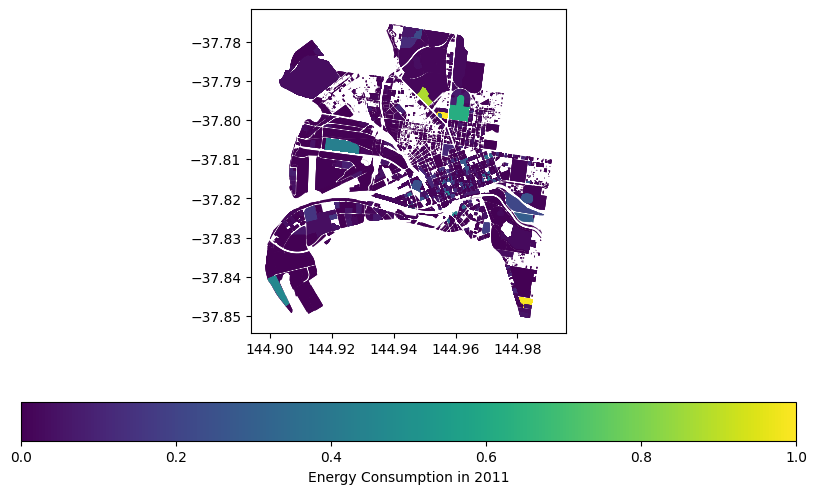

In [31]:
def plot_energy_consumption_by_year(gdf, year):
    # 根据选定的年份筛选数据
    if year not in [2011, 2016, 2021]:
        print("Unsupported year. Please choose from 2011, 2016, or 2021.")
        return

    # 创建一个新的 GeoDataFrame 用于存储筛选后的数据
    data_for_year = model_gdf.copy()

    # 根据年份选择对应的能源消耗列
    total_column = f"total_{year}"

    # 能源消耗数据进行标准化
    data_for_year[total_column] = (data_for_year[total_column] - data_for_year[total_column].min()) / (data_for_year[total_column].max() - data_for_year[total_column].min())

    # 绘图
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    data_for_year.plot(column=total_column, ax=ax, legend=True,
                       legend_kwds={'label': f"Energy Consumption in {year}", 'orientation': "horizontal"})
    plt.show()

# 示例调用函数
plot_energy_consumption_by_year(model_gdf, 2011)


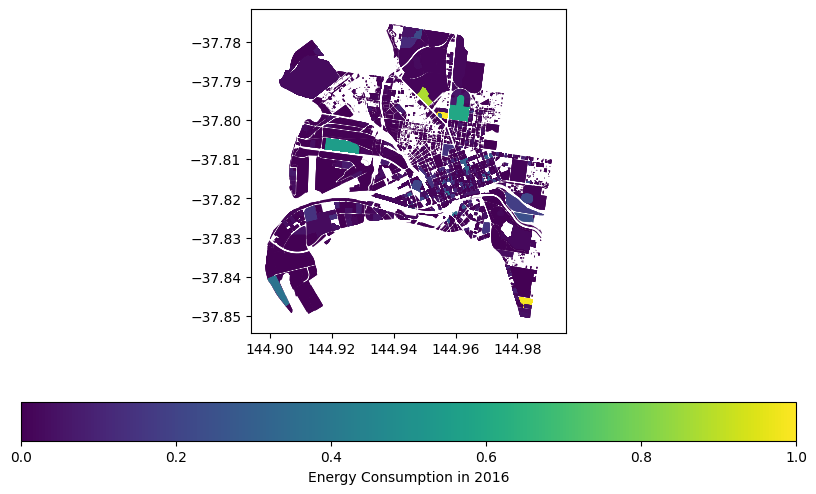

In [27]:
plot_energy_consumption_by_year(model_gdf, 2016)

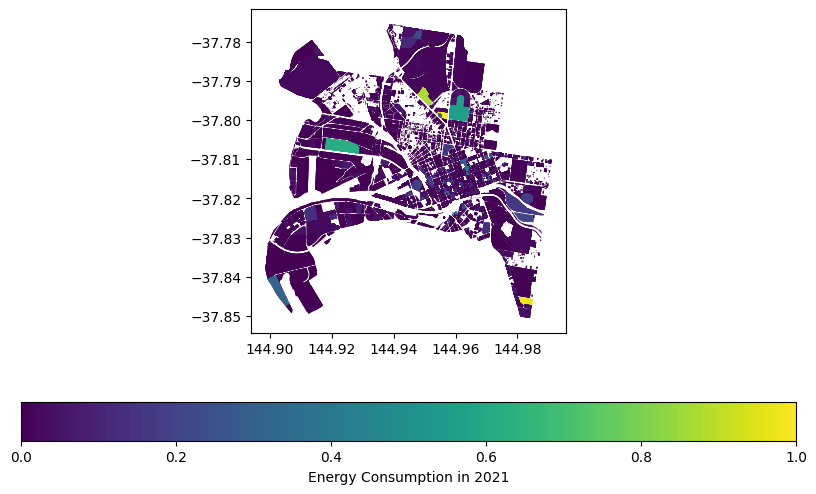

In [28]:
plot_energy_consumption_by_year(model_gdf, 2021)

In [52]:
model_gdf

Census year  Block ID  Property ID  CLUE small area  \
0             2016        54       108108  Melbourne (CBD)   
1             2016        54       108108  Melbourne (CBD)   
2             2016        54       108108  Melbourne (CBD)   
3             2016        54       108108  Melbourne (CBD)   
4             2016        54       108108  Melbourne (CBD)   
...            ...       ...          ...              ...   
49457         2016       377       109862  North Melbourne   
49458         2016       378       103820  North Melbourne   
49459         2016       620       109653   East Melbourne   
49460         2016       736       559332        Southbank   
49461         2016       864       100184      South Yarra   

                   Trading name  \
0                        Vacant   
1      Red Design Group Pty Ltd   
2                        Elders   
3             Falconer Advisers   
4      Clinuvel Pharmacueticals   
...                         ...   
49457                    Vacant   
49458                    Vacant   
49459            Wilson Parking   
49460                    Vacant   
49461                    Vacant   

                                    Business address  Industry (ANZSIC4) code  \
0      Part Level 5, 160 Queen Street MELBOURNE 3000                        0   
1          Level 12, 160 Queen Street MELBOURNE 3000                     6921   
2                    160 Queen Street MELBOURNE 3000                     6720   
3      Part Level 5, 160 Queen Street MELBOURNE 3000                     6419   
4      Part Level 5, 160 Queen Street MELBOURNE 3000                     3720   
...                                              ...                      ...   
49457        46 Villiers Street NORTH MELBOURNE 3051                        0   
49458      85-0 Flemington Road NORTH MELBOURNE 3051                        0   
49459           16 Albert Street EAST MELBOURNE 3002                     9533   
49460            42-48 Balston Street SOUTHBANK 3006                        0   
49461            37-41 Adams Street SOUTH YARRA 3141                        0   

                        Industry (ANZSIC4) description  \
0                                         Vacant Space   
1                               Architectural Services   
2                                 Real Estate Services   
3      Other Auxiliary Finance and Investment Services   
4        Pharmaceutical and Toiletry Goods Wholesaling   
...                                                ...   
49457                                     Vacant Space   
49458                                     Vacant Space   
49459                                 Parking Services   
49460                                     Vacant Space   
49461                                     Vacant Space   

                                     Geo Point  \
0       -37.81453148379181, 144.96101458242313   
1       -37.81453148379181, 144.96101458242313   
2       -37.81453148379181, 144.96101458242313   
3       -37.81453148379181, 144.96101458242313   
4       -37.81453148379181, 144.96101458242313   
...                                        ...   
49457   -37.79954575999863, 144.95345943118508   
49458  -37.798730344393576, 144.95306694427245   
49459    -37.80961024176534, 144.9819236077246   
49460    -37.82669033578245, 144.9625197382967   
49461  -37.836001470333365, 144.97713251548714   

                                                geometry   total_2011  \
0      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
1      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
2      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
3      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
4      MULTIPOLYGON (((144.96126 -37.81466, 144.96078...  2839.400056   
...                                                  ...          ...   
49457  MULTIPOLYGON (((144.95357 -37.79959, 144.95352...   

In [49]:
import geopandas as gpd
import folium

# 确保 model_gdf 是 GeoDataFrame 并且包含几何信息
# model_gdf 包含 'geometry'

# 计算每个位置上的 geometry 数量
industry_count_by_geometry = model_gdf.groupby(model_gdf.geometry).size().reset_index(name='industry_count')

# 将统计结果转换为 GeoDataFrame
industry_count_gdf = gpd.GeoDataFrame(industry_count_by_geometry, geometry=industry_count_by_geometry.geometry)

# 重新确保几何列正确设置
industry_count_gdf = gpd.GeoDataFrame(industry_count_gdf, geometry='geometry')
industry_count_gdf.crs = model_gdf.crs


In [51]:
industry_count_gdf

geometry  industry_count
0     MULTIPOLYGON (((144.91213 -37.84098, 144.91239...               2
1     MULTIPOLYGON (((144.91069 -37.84127, 144.91087...               3
2     MULTIPOLYGON (((144.90188 -37.83970, 144.90380...               2
3     MULTIPOLYGON (((144.90503 -37.84477, 144.90506...               3
4     MULTIPOLYGON (((144.90122 -37.83379, 144.90120...               3
...                                                 ...             ...
4657  MULTIPOLYGON (((144.97988 -37.84711, 144.98098...               2
4658  MULTIPOLYGON (((144.98165 -37.84706, 144.98162...               7
4659  MULTIPOLYGON (((144.98355 -37.84956, 144.98337...              10
4660  MULTIPOLYGON (((144.98426 -37.84952, 144.98409...               3
4661  MULTIPOLYGON (((144.98464 -37.84730, 144.98448...               5

[4662 rows x 2 columns]

In [74]:
# 筛选出 Census year 为 2011 的数据
data_2011 = model_gdf[model_gdf['Census year'] == 2011]

# 计算每个位置的行业数量
industry_count_2011 = data_2011.groupby('geometry').size().reset_index(name='industry_count')

# 添加 total_2011 列
industry_count_2011['total_2011'] = data_2011.groupby('geometry')['total_2011'].first().values

# 转换为 GeoDataFrame
industry_count_gdf_2011 = gpd.GeoDataFrame(industry_count_2011, geometry=industry_count_2011.geometry)

industry_count_gdf_2011

geometry  industry_count  \
0     MULTIPOLYGON (((144.91213 -37.84098, 144.91239...               1   
1     MULTIPOLYGON (((144.91069 -37.84127, 144.91087...               1   
2     MULTIPOLYGON (((144.90188 -37.83970, 144.90380...               1   
3     MULTIPOLYGON (((144.90503 -37.84477, 144.90506...               1   
4     MULTIPOLYGON (((144.90122 -37.83379, 144.90120...               1   
...                                                 ...             ...   
4486  MULTIPOLYGON (((144.98072 -37.84634, 144.97969...              13   
4487  MULTIPOLYGON (((144.98165 -37.84706, 144.98162...               3   
4488  MULTIPOLYGON (((144.98355 -37.84956, 144.98337...               2   
4489  MULTIPOLYGON (((144.98426 -37.84952, 144.98409...               1   
4490  MULTIPOLYGON (((144.98464 -37.84730, 144.98448...               2   

        total_2011  
0         0.000000  
1         0.000000  
2     26277.198820  
3         0.000000  
4         0.000000  
...            ...  
4486    328.909479  
4487    338.261974  
4488   3007.185746  
4489   1950.008355  
4490   2697.318460  

[4491 rows x 3 columns]

In [73]:
# 筛选出 Census year 为 2016 的数据
data_2016 = model_gdf[model_gdf['Census year'] == 2016]

# 计算每个位置的行业数量
industry_count_2016 = data_2016.groupby('geometry').size().reset_index(name='industry_count')

# 添加 total_2016 列
industry_count_2016['total_2016'] = data_2016.groupby('geometry')['total_2016'].first().values

# 转换为 GeoDataFrame
industry_count_gdf_2016 = gpd.GeoDataFrame(industry_count_2016, geometry=industry_count_2016.geometry)

industry_count_gdf_2016

geometry  industry_count  \
0     MULTIPOLYGON (((144.91213 -37.84098, 144.91239...               1   
1     MULTIPOLYGON (((144.91069 -37.84127, 144.91087...               1   
2     MULTIPOLYGON (((144.90188 -37.83970, 144.90380...               1   
3     MULTIPOLYGON (((144.90503 -37.84477, 144.90506...               1   
4     MULTIPOLYGON (((144.90122 -37.83379, 144.90120...               1   
...                                                 ...             ...   
4400  MULTIPOLYGON (((144.97988 -37.84711, 144.98098...               1   
4401  MULTIPOLYGON (((144.98165 -37.84706, 144.98162...               3   
4402  MULTIPOLYGON (((144.98355 -37.84956, 144.98337...               4   
4403  MULTIPOLYGON (((144.98426 -37.84952, 144.98409...               1   
4404  MULTIPOLYGON (((144.98464 -37.84730, 144.98448...               1   

        total_2016  
0         0.000000  
1         0.000000  
2     27031.293040  
3         0.000000  
4         0.000000  
...            ...  
4400      0.000000  
4401    341.876936  
4402   3159.806922  
4403   2357.167383  
4404   2795.009682  

[4405 rows x 3 columns]

In [71]:
# 筛选出 Census year 为 2021 的数据
data_2021 = model_gdf[model_gdf['Census year'] == 2021]

# 计算每个位置的行业数量
industry_count_2021 = data_2021.groupby('geometry').size().reset_index(name='industry_count')

# 添加 total_2021 列
industry_count_2021['total_2021'] = data_2021.groupby('geometry')['total_2021'].first().values

# 转换为 GeoDataFrame
industry_count_gdf_2021 = gpd.GeoDataFrame(industry_count_2021, geometry=industry_count_2021.geometry)

industry_count_gdf_2021


geometry  industry_count  \
0     MULTIPOLYGON (((144.91069 -37.84127, 144.91087...               1   
1     MULTIPOLYGON (((144.90503 -37.84477, 144.90506...               1   
2     MULTIPOLYGON (((144.90122 -37.83379, 144.90120...               1   
3     MULTIPOLYGON (((144.90123 -37.83296, 144.90156...               1   
4     MULTIPOLYGON (((144.91416 -37.83547, 144.91419...               1   
...                                                 ...             ...   
4202  MULTIPOLYGON (((144.97988 -37.84711, 144.98098...               1   
4203  MULTIPOLYGON (((144.98165 -37.84706, 144.98162...               1   
4204  MULTIPOLYGON (((144.98355 -37.84956, 144.98337...               4   
4205  MULTIPOLYGON (((144.98426 -37.84952, 144.98409...               1   
4206  MULTIPOLYGON (((144.98464 -37.84730, 144.98448...               2   

       total_2021  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
...           ...  
4202     0.000000  
4203   344.961333  
4204  3294.384170  
4205  2687.895402  
4206  2895.252819  

[4207 rows x 3 columns]

In [63]:
# 初始化地图
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# 为每个位置添加气泡并在气泡上显示行业数量
for _, row in industry_count_gdf_2011.iterrows():
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],  # 使用地块的中心点作为位置
        radius=5,  # 设置固定的气泡大小
        popup=f"Industry Count: {row['industry_count']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 显示地图
m
